In [1]:
from datetime import datetime
from datetime import timedelta
import time
start_time = time.time()

In [2]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.5.1


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import   pandas                 as      pd
import   numpy                  as      np
import   matplotlib.pyplot      as      plt
import   seaborn                as      sns
import   scipy.stats            as      stats
from     scipy                  import  stats
import   statsmodels.api        as     sm
from     sklearn.preprocessing                 import   LabelEncoder
from     statsmodels.stats.outliers_influence  import   variance_inflation_factor
import   warnings

from    sklearn.preprocessing    import   StandardScaler
from    sklearn.preprocessing    import   MinMaxScaler
from    sklearn.tree             import   DecisionTreeClassifier
from    sklearn.metrics          import   accuracy_score, explained_variance_score

from    sklearn.experimental     import enable_iterative_imputer
from    sklearn.impute           import IterativeImputer
from    sklearn.linear_model      import LinearRegression

In [5]:
from   sklearn.feature_selection   import  RFECV
from   sklearn.feature_selection   import  RFE
from   sklearn                     import  metrics
from   sklearn.pipeline            import  Pipeline
from   sklearn                     import  preprocessing   
from   sklearn.model_selection     import  cross_val_score
from   sklearn.model_selection     import  RepeatedStratifiedKFold
from   sklearn.ensemble            import  RandomForestClassifier
from   sklearn.model_selection     import  train_test_split

In [6]:
import  os

folder =  r'E:\DSE-FT-C-May24-G5'

os.chdir(folder)

In [7]:
def get_significant_vars( lm, sig_level ):
    
    import pandas as pd
    
    var_p_vals_df         = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    
    return list( var_p_vals_df[var_p_vals_df.pvals <= sig_level]['vars'] )


In [8]:
def check_linearity(x1, df, title, y1):
    
    import matplotlib.pyplot as plt
    import seaborn           as sns    
    sns.regplot(x = x1, y= y1, data= df, logistic= True).set_title(title)
    plt.show()

In [9]:
def logit_reg(n_splits, random_state, X_train, X_test, Y_train, Y_test ):  

    import statsmodels.api          as      sm
    
    from   sklearn.linear_model     import  LogisticRegression 
    from   sklearn.metrics          import  classification_report
    from   sklearn.metrics          import  confusion_matrix
    from   sklearn.model_selection  import  cross_val_score
    
    from   sklearn.model_selection  import  KFold 
    
    model = LogisticRegression() 

    model.fit(X_train, Y_train) 
    predicted_train    = model.predict(X_train) 
    matrix             = confusion_matrix(Y_train, predicted_train)
    print("\nTraining Data")
    print(matrix)
    draw_cm(Y_train, predicted_train )
    
    accuracy_train = model.score(X_train, Y_train) 
    print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))

    print("\nTesting Data")

    predicted_testing  = model.predict(X_test) 
    matrix             = confusion_matrix(Y_test, predicted_testing)
    print(matrix)
    draw_cm(Y_test, predicted_testing)
    
    accuracy_test      = model.score(X_test, Y_test) 
    print("Test Accuracy: %.3f%%" % (accuracy_test * 100.0))
    

    measures_train     = classification_report(Y_train, predicted_train) 
    print("\nTraining data")
    print(measures_train) 

    measures_test      = classification_report(Y_test, predicted_testing) 
    print("\nTesting data")
    print(measures_test) 
    
    kfold              = KFold(n_splits = n_splits, shuffle = True, random_state = random_state)
    scoring            = 'roc_auc' 

    auc_train          = cross_val_score(model, X_train, Y_train,  scoring=scoring) 
    print("\nTraining data")
    draw_roc( Y_train, predicted_train)    


    auc_test           = cross_val_score(model, X_test, Y_test,  scoring=scoring) 
    print("\nTesting data")    
    draw_roc( Y_test, predicted_testing)
    
    print("\nWith K fold cross validation")
    
    scoring           = 'accuracy'
    print("\nScoring:  %s" %scoring)
    cv_accuracy_train = cross_val_score(model, X_train, Y_train, cv = kfold,  scoring=scoring)
    print(cv_accuracy_train)
    print("\nAccuracy: %.3f (%.3f)" % (cv_accuracy_train.mean(), cv_accuracy_train.std()))
    
    scoring           = 'precision'
    print("\nScoring:  %s" %scoring)    
    cv_precision_train = cross_val_score(model, X_train, Y_train, cv = kfold,  scoring=scoring)
    print(cv_precision_train)
    print("\nPrecision: %.3f (%.3f)" % (cv_precision_train.mean(), cv_precision_train.std()))
  
    scoring           = 'recall'
    print("\nScoring:  %s" %scoring)
    
    cv_recall_train   = cross_val_score(model, X_train, Y_train, cv = kfold,  scoring=scoring)
    print(cv_recall_train)
    print("\nRecall: %.3f (%.3f)" % (cv_recall_train.mean(), cv_recall_train.std()))
    
    scoring           = 'roc_auc'
    print("\nScoring:  %s" %scoring)    
    cv_roc_auc_train = cross_val_score(model, X_train, Y_train, cv = kfold,  scoring=scoring)
    print(cv_roc_auc_train)
    print("\nAUROC: %.3f (%.3f)" % (cv_roc_auc_train.mean(), cv_roc_auc_train.std()))
    

In [10]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()   

In [11]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

### Read data

In [13]:
X  = pd.read_csv('./Data/Processed_data_X_2024-12-01 19-34-10.csv')
y  = pd.read_csv('./Data/Processed_data_y_2024-12-01 19-34-10.csv')

In [14]:
y.head()

,Target_code
0,1
1,0
2,1
3,0
4,0


In [15]:
X_ =  X[['Tenure', 'Balance', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Geography_code', 'Gender_code']]

## Assumptions Check for Logistic Regression

### Assumption 1 - Binary logistic regression requires the target / dependent variable to be binary. 

For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome (such as Success etc..).

### Assumption 2 -  Only the meaningful variables should be included.

### Assumption 3 -The predictor variables should not be correlated to each other meaning the model should have little or no multicollinearity.

### Assumption 4 - The independent variables are linearly related to the log odds.

### Assumption 5 -  Logistic regression requires quite a large number of observations.

#### Assumption 1 - Binary logistic regression requires the target / dependent variable to be binary. 

In [18]:
y['Target_code'].value_counts()

Target_code
0    7962
1    2038
Name: count, dtype: int64

### Observations

The target variable is categorical having 0 and 1 binary

#### Assumption 2 -  Only the meaningful variables should be included.

We have ensured that there are no unwanted variables selected for model building.

#### Assumption 3 -The predictor variables should not be correlated to each other meaning the model should have little or no multicollinearity.

In [23]:
def calculate_VIF(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    #calculate VIF for each explanatory variable
    vif             =  pd.DataFrame()
    vif['VIF']      =  [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['variable'] =  X.columns

    #view VIF for each explanatory variable 
    return vif

In [24]:
vif_df  = calculate_VIF(X_)
vif_df.sort_values(by = ['VIF'], ascending = False, inplace = True)
vif_df

,VIF,variable
5,3.564209,Satisfaction Score
0,3.039833,Tenure
7,1.998514,Gender_code
2,1.893380,IsActiveMember
6,1.708588,Geography_code
4,1.247102,Complain
1,1.112117,Balance
3,1.000601,EstimatedSalary


### Observations

All the variables are non-colliear as their VIF values are less than the threshold value of 5:
* 1. Satisfaction Score (3.564209)
* 2. Tenure(3.039833)
* 3. Gender_code(1.998514)
* 4. IsActiveMember(1.893380)
* 5. Geography_code(1.708588)
* 6. Complain(1.247102)
* 7. Balance(1.112117)
* 8. EstimatedSalary(1.000601)


#### Assumption 4 - The independent variables are linearly related to the log odds.

We need to check the assumption of Independent variables are linearly related to the log odds.

One way to checking this is to plot the Independent variables in question and look for an S-shaped curve.

In [28]:
df2                 =  X_.copy()

In [29]:
df2['Target_code']  =  y

In [30]:
df2.head().T

,0,1,2,3,4
Tenure,2.000000,1.000000,8.000000,1.000000,2.000000
Balance,-0.761480,-0.104906,0.489346,-0.761480,0.221806
IsActiveMember,1.000000,1.000000,0.000000,0.000000,1.000000
EstimatedSalary,0.011739,0.125512,0.139630,-0.064717,-0.214561
Complain,1.000000,1.000000,1.000000,0.000000,0.000000
Satisfaction Score,2.000000,3.000000,3.000000,5.000000,5.000000
Geography_code,0.000000,2.000000,0.000000,0.000000,2.000000
Gender_code,0.000000,0.000000,0.000000,0.000000,0.000000
Target_code,1.000000,0.000000,1.000000,0.000000,0.000000


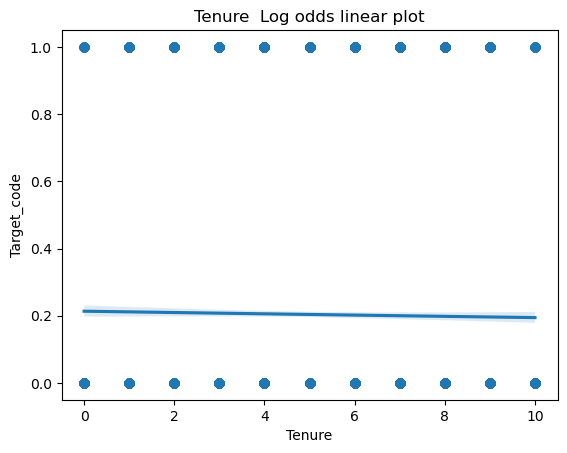

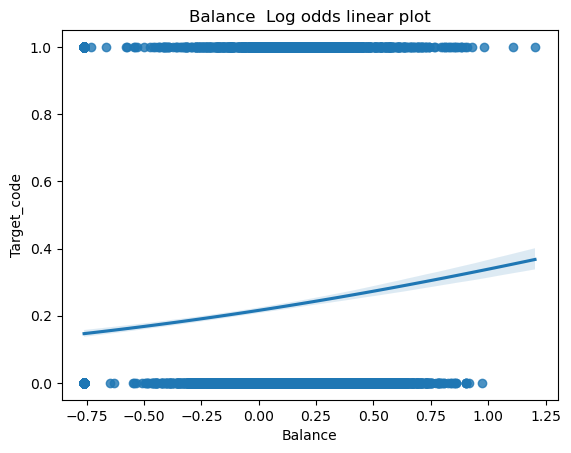

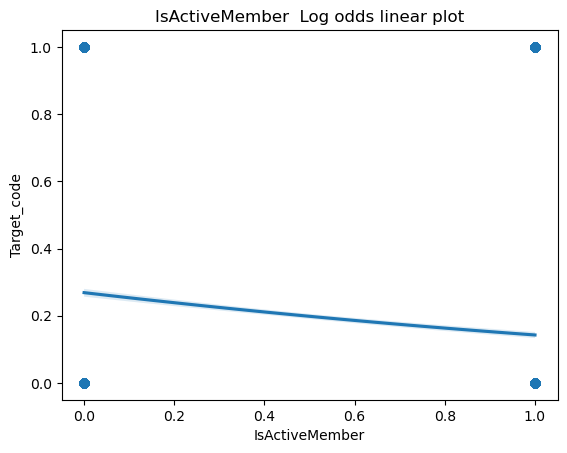

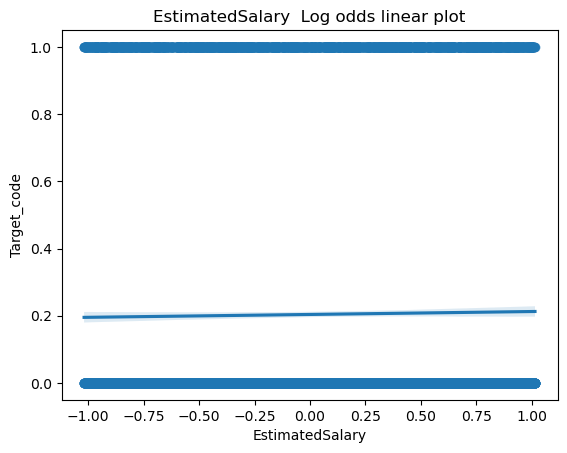

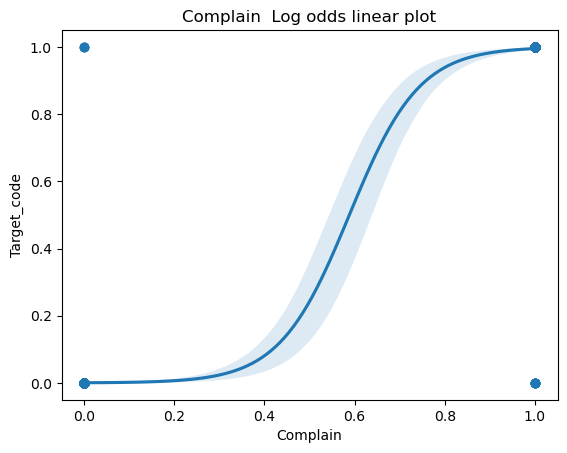

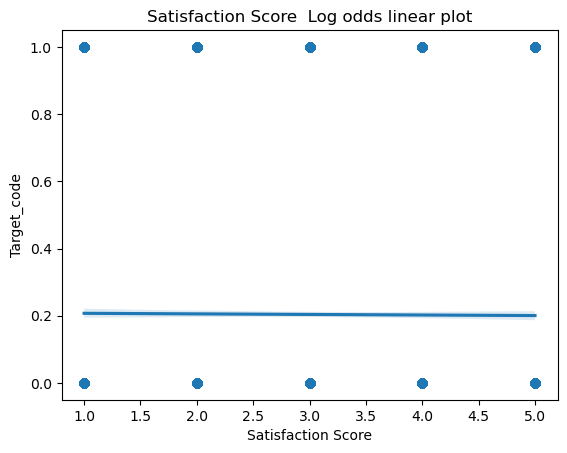

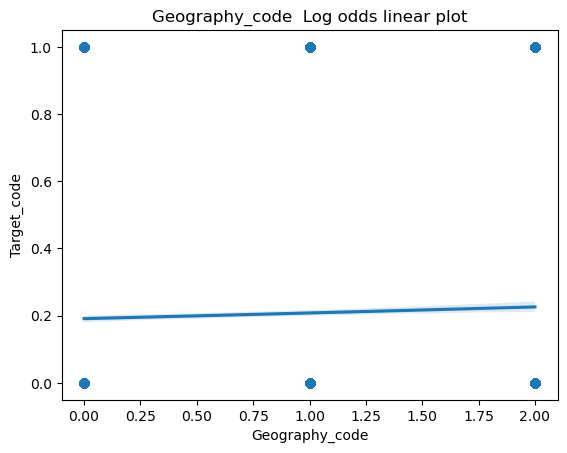

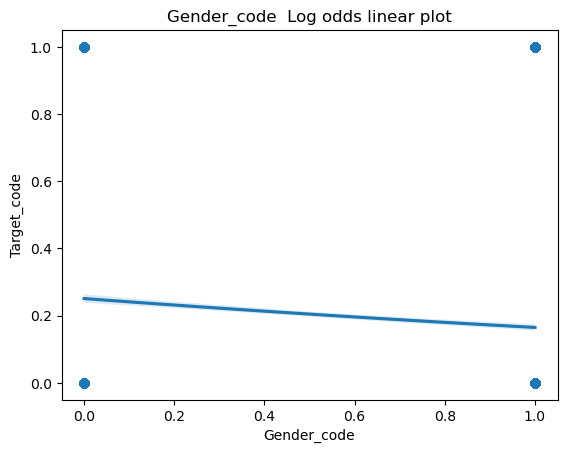

In [31]:
target        =  'Target_code'
num_variables =   ['Tenure', 'Balance', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Geography_code', 'Gender_code']

for i in range(len(num_variables)):
    title = num_variables[i] + '  Log odds linear plot'
    xvar  = num_variables[i]
    check_linearity(xvar,    df2, title, target)

#### Assumption 5 -  Logistic regression requires quite a large number of observations.

In [33]:
#Number of events (cases where Response == 1)
num_events = df2['Target_code'].sum()

# Number of predictor variables (excluding 'Response')
num_predictors = len(X_.columns)

# Number of events per predictor variable
events_per_predictor = num_events / num_predictors

print("Number of events:", num_events)
print("Number of predictor variables:", num_predictors)
print("Events per predictor:", events_per_predictor)

Number of events: 2038
Number of predictor variables: 8
Events per predictor: 254.75


**Explanation:**

We calculate the number of events by summing the 'Target_code' column, which represents the cases where the outcome of interest occurs.

We calculate the number of predictor variables by counting the number of columns in the DataFrame and excluding the outcome variable.

We divide the number of events by the number of predictor variables to get the events per predictor.

We can then compare the calculated events per predictor with the recommended guideline of 10-20. If the ratio is below this guideline, it may indicate a potential violation of the assumption of a sufficiently large sample size.

### Observations:

With 2038 events and 8 predictor variables, the calculated number of events per predictor is approximately 254.75. This exceeds the commonly recommended guideline of having at least 10-20 events per predictor variable.

Inference: The dataset appears to meet the assumption of having a sufficiently large sample size for logistic regression.

Having a high number of events per predictor variable suggests that there should be adequate statistical power and precision in estimating the model parameters, enhancing the reliability of the logistic regression analysis. Therefore, the dataset likely provides a robust basis for fitting a logistic regression model and conducting statistical inference.

In [36]:
start_time = time.time()

In [37]:
## Split the data into train and test datasets
X_train, X_test, Y_train, Y_test  = train_test_split(X_, y, stratify = y,test_size = 0.30)

In [38]:
vals, counts = np.unique(Y_test, return_counts = True)
print(vals, counts)

[0 1] [2389  611]


In [39]:
print("\nShape: Total observations %d Total features %d" %(X_train.shape[0], X_train.shape[1]))


Shape: Total observations 7000 Total features 8


In [40]:
logit = sm.Logit( Y_train, sm.add_constant( X_train ) )
lg    = logit.fit()

Optimization terminated successfully.
         Current function value: 0.008369
         Iterations 12


#### Report Psuedo R-square, model coefficients and p-value

In [42]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:            Target_code   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6991
Method:                           MLE   Df Model:                            8
Date:                Sun, 01 Dec 2024   Pseudo R-squ.:                  0.9835
Time:                        20:01:23   Log-Likelihood:                -58.584
converged:                       True   LL-Null:                       -3539.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.6290      1.226     -5.406      0.000      -9.033      -4.225
Tenure                -0.0222      0.116     -0.191      0.848      -0.250       0.205
Balance             

**Observation**

We observe that the McFadden R square (Pseudo R square) is 98 % and the model fitness is very good.
This McFadden approach is one minus the ratio of two log likelihoods. The numerator is the log likelihood of the logit model selected and the denominator is the log likelihood if the model just had an intercept.

A goodness of fit using McFadden‟s pseudo r square (ρ^2) is used for fitting the overall model. McFadden suggested ρ^2 values of between 0.2 and 0.4 should be taken to represent a very good fit of the model (Louviere et al.,2000).
http://www.lifesciencesite.com/lsj/life1002/286_B01288life1002_2028_2036.pdf

### List the significant variables at 5% level of significance

In [45]:
significant_vars = get_significant_vars( lg, sig_level = 0.05 )
print(significant_vars)

['const', 'IsActiveMember', 'Complain']


**Observation**

The following variables are significant at 5 % level of significance:

| SlNo | Significant variable |                      | 
| ---- | -------------------- | -------------------- |   
| 1 | IsActiveMember | Whether the customer is active or not.| 
| 2 | Complain |Whether the customer has complaint or not. | 

### Get Odds ratio

In [48]:
significant_vars

['const', 'IsActiveMember', 'Complain']

In [49]:
ODDs_Ratio_df   =  pd.DataFrame({'Important Variable' : lg.params.index, 'Log-odds' : lg.params.values })
ODDs_Ratio_df   =  ODDs_Ratio_df.loc[ODDs_Ratio_df['Important Variable'].isin(significant_vars), :]
ODDs_Ratio_df.drop(0, inplace = True)

In [50]:
ODDs_Ratio_df['Odds Ratio']  =  np.exp(ODDs_Ratio_df['Log-odds'])
ODDs_Ratio_df['Probability'] =   np.exp(ODDs_Ratio_df['Log-odds']) / (1 +  np.exp(ODDs_Ratio_df['Log-odds']))
ODDs_Ratio_df.sort_values(by=['Odds Ratio'], ascending=False, inplace = True)

In [51]:
ODDs_Ratio_df

,Important Variable,Log-odds,Odds Ratio,Probability
5,Complain,13.785708,970637.592716,0.999999
3,IsActiveMember,-1.768583,0.170575,0.145719


### Interpretation for significant variables with good probability

We observe that the probability of customers who churn is 99.99 % if they have complaints.

## END